In [1]:
# Load the data and explore the dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the titanic dataset
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
# Get basic info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
# Check for the distribution of the survived column
df['survived'].value_counts(normalize = True)

survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

C:\Users\Admin\AppData\Local\Temp\ipykernel_21520\519269637.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['survived'], palette = 'coolwarm')


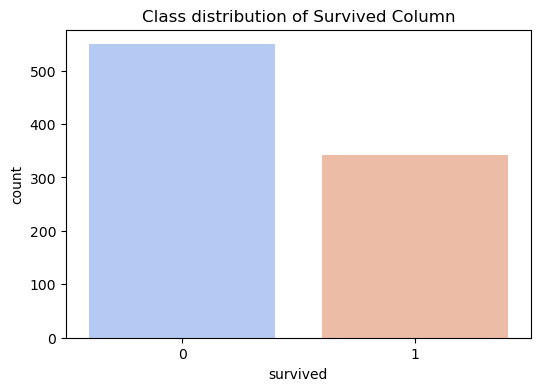

In [6]:
# Visualize class imbalance
plt.figure(figsize = (6,4))
sns.countplot(x = df['survived'], palette = 'coolwarm')
plt.title("Class distribution of Survived Column")
plt.show()

# Handling imbalanced dataset
1. Resampling technique
   A. Undersampling the majority class

In [8]:
from sklearn.utils import resample

# Seperate the majority and the minority class
df_majority = df[df['survived'] == 0]
df_minority = df[df['survived'] == 1]

# Downsample the majority class
df_majority_downsampled = resample(df_majority,
                                   replace = False, # Smaple without replacement
                                   n_samples = len(df_minority),
                                   random_state = 42) # used for reproducibility
# Combine the downsampled majority with the minority class
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Check the balance 
df_balanced['survived'].value_counts()

survived
0    342
1    342
Name: count, dtype: int64

## Oversampling the minority class

In [10]:
# Upsample the minority class
df_minority_upsampled = resample(df_minority,
                                 replace = True,
                                 n_samples = len(df_majority),
                                 random_state = 42)
# combine the upsampled minority class with majority class
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Check the class distribution
df_balanced['survived'].value_counts()

survived
0    549
1    549
Name: count, dtype: int64

## SMOTE - Synthetic Minority Oversampling Technique


In [12]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

df_clean = df.drop(columns = ['sex', 'embark_town', 'class', 'who', 'adult_male', 'deck', 'embarked', 'alive', 'alone'])

# Drop missing data
df_clean = df_clean.dropna()

# Split my data into the features and target variable
X = df_clean.drop(columns = ['survived'])
y = df_clean['survived']

# Split the data into the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# APply the smote techniqques
smote = SMOTE(random_state = 42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Check the new class distribution
pd.Series(y_train_sm).value_counts()

survived
1    337
0    337
Name: count, dtype: int64